<a href="https://colab.research.google.com/github/mahemon/PySpark-practice/blob/main/dataload-environment-select-sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with rows

## Download and install Spark

In [ ]:
!ls

sample_data


In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

## Setup environment

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [ ]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


## Downloading and preprocessing Chicago's Reported Crime Data

In [ ]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2022-06-30 17:09:31--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [            <=>     ]   1.66G  2.98MB/s    in 9m 53s  

2022-06-30 17:19:25 (2.87 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1787007282]

total 1965732
-rw-r--r--  1 root root 1787007282 Jun 30 10:47 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x  1 root root       4096 Jun 29 13:44  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
ls

'rows.csv?accessType=DOWNLOAD'   spark-2.3.1-bin-hadoop2.7/
 sample_data/                    spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1965732
-rw-r--r--  1 root root 1787007282 Jun 30 10:47 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Jun 29 13:44 sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,TimestampType,DoubleType
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains

## Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [ ]:
from pyspark.sql import functions

In [ ]:
from pyspark.sql.functions import lower,upper, min, max, date_add, date_sub

In [ ]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type'))).show(5)

+-------------------+-------------------+
|lower(Primary Type)|upper(Primary Type)|
+-------------------+-------------------+
|            battery|            BATTERY|
|              theft|              THEFT|
|              theft|              THEFT|
|          narcotics|          NARCOTICS|
|            assault|            ASSAULT|
+-------------------+-------------------+
only showing top 5 rows



In [ ]:
rc.select(date_add(max(col('Date')),3)).show(5)

+----------------------+
|date_add(max(Date), 3)|
+----------------------+
|            2018-11-13|
+----------------------+



In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [ ]:
rc.select(to_date(lit('2019-12-25')), to_date(lit('2019-12-30'))).show(2)

+---------------------+---------------------+
|to_date('2019-12-25')|to_date('2019-12-30')|
+---------------------+---------------------+
|           2019-12-25|           2019-12-30|
|           2019-12-25|           2019-12-30|
+---------------------+---------------------+
only showing top 2 rows



In [ ]:
df=spark.createDataFrame([('2019-12-25 13:30:00','Adam')], ['Christmas', 'name'])
df.show(1)

+-------------------+----+
|          Christmas|name|
+-------------------+----+
|2019-12-25 13:30:00|Adam|
+-------------------+----+



In [ ]:
df.select(to_date(col('Christmas'), 'yyyy-mm-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-mm-dd HH:mm:ss'), col('Name')).show(1)

+-------------------------------------------+------------------------------------------------+----+
|to_date(`Christmas`, 'yyyy-mm-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-mm-dd HH:mm:ss')|Name|
+-------------------------------------------+------------------------------------------------+----+
|                                 2019-01-25|                             2019-01-25 13:30:00|Adam|
+-------------------------------------------+------------------------------------------------+----+



In [ ]:
!wget https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2022-06-30 18:12:32--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2022-06-30 18:12:33 (575 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [5699]



In [ ]:
!wget -O  police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2022-06-30 18:13:10--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2022-06-30 18:13:10 (823 MB/s) - ‘police-station.csv’ saved [5699]



In [ ]:
!ls

 police-station.csv		 spark-2.3.1-bin-hadoop2.7
 reported-crimes.csv		 spark-2.3.1-bin-hadoop2.7.tgz
'rows.csv?accessType=DOWNLOAD'	 spark-warehouse
 sample_data


In [ ]:
ps= spark.read.csv('police-station.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [ ]:
rc.count()

6755414

In [ ]:
ps.count()

In [ ]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [ ]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [ ]:
ps.select(lpad(col('DISTRICT'),3,'0')).show(20)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [ ]:
ps = ps.withColumn('Format_district',lpad(col('DISTRICT'),3,'0'))
ps.show(10)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters|  Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|    Near North|  1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742

In [ ]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').show(10)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district

In [ ]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [ ]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION').show(10)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|      Deering| 

In [ ]:
rc.select(col('Primary Type')).distinct().count()

36

In [ ]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36, truncate=False)

+--------------------+
|        Primary Type|
+--------------------+
|               ARSON|
|             ASSAULT|
|             BATTERY|
|            BURGLARY|
|CONCEALED CARRY L...|
| CRIM SEXUAL ASSAULT|
|     CRIMINAL DAMAGE|
|CRIMINAL SEXUAL A...|
|   CRIMINAL TRESPASS|
|  DECEPTIVE PRACTICE|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|            HOMICIDE|
|   HUMAN TRAFFICKING|
|INTERFERENCE WITH...|
|        INTIMIDATION|
|          KIDNAPPING|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|           NARCOTICS|
|      NON - CRIMINAL|
|        NON-CRIMINAL|
|NON-CRIMINAL (SUB...|
|           OBSCENITY|
|OFFENSE INVOLVING...|
|OTHER NARCOTIC VI...|
|       OTHER OFFENSE|
|        PROSTITUTION|
|    PUBLIC INDECENCY|
|PUBLIC PEACE VIOL...|
|           RITUALISM|
|             ROBBERY|
|         SEX OFFENSE|
|            STALKING|
|               THEFT|
|   WEAPONS VIOLATION|
+--------------------+



In [ ]:
nc = rc.filter( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(36)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|      NON - CRIMINAL|   FOID - REVOCATION|           RESIDE

In [ ]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+--------------------------------------+-----+
|Description                           |count|
+--------------------------------------+-----+
|FOID - REVOCATION                     |38   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER|9    |
+--------------------------------------+-----+



In [ ]:
from pyspark.sql.functions import dayofweek

In [ ]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [ ]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [ ]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import date_format

In [ ]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [ ]:
rc.select(col('Date'),dayofweek(col('Date')), date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [ ]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count', ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017282|
|                 Wed| 974192|
|                 Tue| 968325|
|                 Sat| 965426|
|                 Thu| 964905|
|                 Mon| 953050|
|                 Sun| 912234|
+--------------------+-------+



In [ ]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912234),
 Row(date_format(Date, E)='Mon', count=953050),
 Row(date_format(Date, E)='Thu', count=964905),
 Row(date_format(Date, E)='Sat', count=965426),
 Row(date_format(Date, E)='Wed', count=974192),
 Row(date_format(Date, E)='Fri', count=1017282),
 Row(date_format(Date, E)='Tue', count=968325)]

In [ ]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [ ]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt 

[912234, 953050, 964905, 965426, 974192, 1017282, 968325]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cp = pd.DataFrame({'Day_of_week': dow, 'Count': cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,912234
1,Mon,953050
2,Thu,964905
3,Sat,965426
4,Wed,974192
5,Fri,1017282
6,Tue,968325


Text(0.5, 1.0, 'No. of reported crimes per day of the week from 2001 to present')

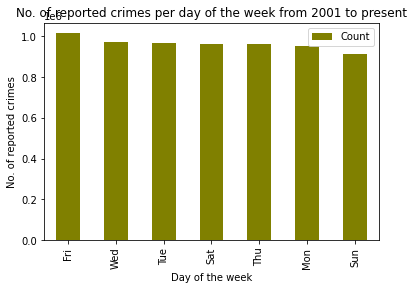

In [ ]:
cp.sort_values('Count', ascending=False).plot(kind='bar', color='olive', x ='Day_of_week', y ='Count')

plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week from 2001 to present')

In [ ]:
import pyarrow.parquet as pq
import pandas as pd

In [ ]:
!wget https://github.com/Teradata/kylo/blob/master/samples/sample-data/parquet/userdata1.parquet

--2022-06-30 19:58:17--  https://github.com/Teradata/kylo/blob/master/samples/sample-data/parquet/userdata1.parquet
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘userdata1.parquet’

userdata1.parquet       [ <=>                ] 130.90K   730KB/s    in 0.2s    

2022-06-30 19:58:18 (730 KB/s) - ‘userdata1.parquet’ saved [134039]



In [ ]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blocks-0012738509-0012739509.parquet to blocks-0012738509-0012739509.parquet


In [ ]:
import pandas as pd

# read
df = pd.read_parquet('blocks-0012738509-0012739509.parquet')

# write
df.to_parquet('my_newfile.parquet')

df.head()

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,...,size,gas_limit,gas_used,timestamp,transactions_len,uncles_len,base_fee_per_gas,mix_hash,nephew,uncle_index
0,12738509,0x99a194c70a1da06d9b814168c839d960afd65588c93f...,0xaf8e1651aaa9916c6446027d177e7b3b220aabb77cfc...,0x7b4aadd054d55bbc,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x01a0110a4961002611800208c011984021002d010000...,0x97a3a6bf11de3e9136d910a52d4a5d9e545130188e6b...,0x86407b483da9791a49b15159963fcace269d2d676d29...,0xb39514a5663cab700f5d5c78a8684d097c2494cf0dc5...,0x1aD91ee08f21bE3dE0BA2ba6918E714dA6B45836,...,63261,14992623,14974386,1625097609,472,0,NaN,0xc0c8cb3494d37cd41de04e479230e3069a74ce47ea15...,NaN,NaN
1,12738510,0xfda65ff4c5bf00c6d8c3d24e7b9f7db95ec7d9300e64...,0x99a194c70a1da06d9b814168c839d960afd65588c93f...,0x4a89f291553dfa5c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x9326730e49536836cea27207850fd2061854f93fb19c...,0xe2fcd1888414740bbd4cd4cb6fb4bb3057a13a239c9c...,0xd506cbc249b3c019d4f713dca66e702281c6ee7db3f5...,0xfba05108550b2fce63f6edb09ddb0420bb89de2d73e4...,0xD224cA0c819e8E97ba0136B3b95ceFf503B79f53,...,53566,15007263,14989478,1625097650,194,0,NaN,0x7afef21b8e1701d5d1cbcc5073b9c40bd322e87d775c...,NaN,NaN
2,12738511,0x9763835bd14e45cb4db102d590793c66725461ce5f71...,0xfda65ff4c5bf00c6d8c3d24e7b9f7db95ec7d9300e64...,0xbcbc52368329f43f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xc0621552883a4d359480b104d006f3780813088da48c...,0x013ebc4b9980d7198356b2c294885d65df017b89fe2b...,0x7f90bc474497f625767310e3c0aee364a4f0120553a8...,0xa1c06de7b6d87c95439fffeb314cba4d01ce44a33094...,0x1aD91ee08f21bE3dE0BA2ba6918E714dA6B45836,...,64472,14992609,14974221,1625097654,182,0,NaN,0xbb473cbad1961463c651df976bad281a190cde5edd08...,NaN,NaN
3,12738512,0x6f2a47c5c673b7335573452a8230f69b5638a8ec2bc1...,0x9763835bd14e45cb4db102d590793c66725461ce5f71...,0xfbdc635f723c8a38,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x11612333a04b510ed1283a409400d7b44141380de619...,0xeed458389be13acf0869ebf3665ee464cb9a37d7a2b0...,0xb41d44e5afb15bd74ba29d52aeb43d0f5742a3e28293...,0xf602c4f91662151c6412b836901dc031a7324e23d8c7...,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,...,53857,14999903,14994348,1625097673,182,0,NaN,0xee0612c0fad8055b4bb52b062e15137eda8d5eb407fc...,NaN,NaN
4,12738513,0x74331f5a38111a461965c33afe730797d8634fa79138...,0x6f2a47c5c673b7335573452a8230f69b5638a8ec2bc1...,0xba3a5ee69903d444,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x6eb49967635a2806d5eb3e6ee7104e7150402d49a108...,0x9b813bc3feae5ecb1b356202c23eeefefd24308e1c8f...,0xf25aca5c48af3c4ac95a42db4d4352590cc7d77f2294...,0x37c203dceaf3242032e29f284f45663b3c4e89fdbcbd...,0x04668Ec2f57cC15c381b461B9fEDaB5D451c8F7F,...,69497,15007220,15006641,1625097697,130,0,NaN,0x874647c865d5575cb0fbe400fb9b8b51b3667af0cce9...,NaN,NaN


In [ ]:
df.columns

Index(['number', 'hash', 'parent_hash', 'nonce', 'sha3_uncles', 'logs_bloom',
       'transactions_root', 'state_root', 'receipts_root', 'miner',
       'difficulty', 'extra_data', 'size', 'gas_limit', 'gas_used',
       'timestamp', 'transactions_len', 'uncles_len', 'base_fee_per_gas',
       'mix_hash', 'nephew', 'uncle_index'],
      dtype='object')

In [ ]:
parqDF2 = spark.read.parquet("my_newfile.parquet")

In [ ]:
parqDF2.printSchema()

root
 |-- number: long (nullable = true)
 |-- hash: string (nullable = true)
 |-- parent_hash: string (nullable = true)
 |-- nonce: string (nullable = true)
 |-- sha3_uncles: string (nullable = true)
 |-- logs_bloom: string (nullable = true)
 |-- transactions_root: string (nullable = true)
 |-- state_root: string (nullable = true)
 |-- receipts_root: string (nullable = true)
 |-- miner: string (nullable = true)
 |-- difficulty: long (nullable = true)
 |-- extra_data: string (nullable = true)
 |-- size: integer (nullable = true)
 |-- gas_limit: long (nullable = true)
 |-- gas_used: long (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- transactions_len: integer (nullable = true)
 |-- uncles_len: integer (nullable = true)
 |-- base_fee_per_gas: double (nullable = true)
 |-- mix_hash: string (nullable = true)
 |-- nephew: double (nullable = true)
 |-- uncle_index: double (nullable = true)



In [ ]:
parqDF2.createOrReplaceTempView("ParquetTable")

In [ ]:
spark.sql("select * from ParquetTable where transactions_len >= 200").show(5)

+--------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+-----+---------+--------+----------+----------------+----------+----------------+--------------------+------+-----------+
|  number|                hash|         parent_hash|             nonce|         sha3_uncles|          logs_bloom|   transactions_root|          state_root|       receipts_root|               miner|      difficulty|          extra_data| size|gas_limit|gas_used| timestamp|transactions_len|uncles_len|base_fee_per_gas|            mix_hash|nephew|uncle_index|
+--------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+-----+---------+--------+----------+---------------

In [ ]:
parqDF = spark.read.parquet("my_newfile.parquet")

In [ ]:
parqDF.createOrReplaceTempView("ParquetTable")

In [ ]:
spark.sql("select * from ParquetTable where transactions_len >= 200").explain()

== Physical Plan ==
*(1) Project [number#0L, hash#1, parent_hash#2, nonce#3, sha3_uncles#4, logs_bloom#5, transactions_root#6, state_root#7, receipts_root#8, miner#9, difficulty#10L, extra_data#11, size#12, gas_limit#13L, gas_used#14L, timestamp#15L, transactions_len#16, uncles_len#17, base_fee_per_gas#18, mix_hash#19, nephew#20, uncle_index#21]
+- *(1) Filter (isnotnull(transactions_len#16) && (transactions_len#16 >= 200))
   +- *(1) FileScan parquet [number#0L,hash#1,parent_hash#2,nonce#3,sha3_uncles#4,logs_bloom#5,transactions_root#6,state_root#7,receipts_root#8,miner#9,difficulty#10L,extra_data#11,size#12,gas_limit#13L,gas_used#14L,timestamp#15L,transactions_len#16,uncles_len#17,base_fee_per_gas#18,mix_hash#19,nephew#20,uncle_index#21] Batched: true, Format: Parquet, Location: InMemoryFileIndex[file:/content/my_newfile.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(transactions_len), GreaterThanOrEqual(transactions_len,200)], ReadSchema: struct<number:bigint,hash:string,

In [ ]:
parkSQL = spark.sql("select * from ParquetTable where transactions_len >= 200")

In [ ]:
parkSQL.show(5)

+--------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+-----+---------+--------+----------+----------------+----------+----------------+--------------------+------+-----------+
|  number|                hash|         parent_hash|             nonce|         sha3_uncles|          logs_bloom|   transactions_root|          state_root|       receipts_root|               miner|      difficulty|          extra_data| size|gas_limit|gas_used| timestamp|transactions_len|uncles_len|base_fee_per_gas|            mix_hash|nephew|uncle_index|
+--------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+-----+---------+--------+----------+---------------

In [ ]:
parkSQL.printSchema()

root
 |-- number: long (nullable = true)
 |-- hash: string (nullable = true)
 |-- parent_hash: string (nullable = true)
 |-- nonce: string (nullable = true)
 |-- sha3_uncles: string (nullable = true)
 |-- logs_bloom: string (nullable = true)
 |-- transactions_root: string (nullable = true)
 |-- state_root: string (nullable = true)
 |-- receipts_root: string (nullable = true)
 |-- miner: string (nullable = true)
 |-- difficulty: long (nullable = true)
 |-- extra_data: string (nullable = true)
 |-- size: integer (nullable = true)
 |-- gas_limit: long (nullable = true)
 |-- gas_used: long (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- transactions_len: integer (nullable = true)
 |-- uncles_len: integer (nullable = true)
 |-- base_fee_per_gas: double (nullable = true)
 |-- mix_hash: string (nullable = true)
 |-- nephew: double (nullable = true)
 |-- uncle_index: double (nullable = true)



JSON Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fx_202101121200.json to fx_202101121200.json
